In [6]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
from collections import defaultdict
from os import walk
import pandas as pd
from ast import literal_eval

## Episode returns and losses

In [6]:
map = 'lbforaging:Foraging-8x8-2p-3f-v2'

In [7]:
def get_episode_data(type):
    base_path = "results/replays"
    data =  []

    folder = f"{base_path}/{map}"
    for (_, subfolders, _) in walk(folder):
        for i in subfolders:
            if i not in ["6","5"]:
                file = f"{folder}/{i}/{type}.pkl"
                if os.path.exists(file):
                    with open(file, 'rb') as handle:
                            ep_data = pickle.load(handle)
                            ep_data = np.array(ep_data)
                            data.append(ep_data)

        return np.array(data)

In [8]:
def make_plot_returns(data):

    data = data.sum(axis=-1)
    std = np.std(data, axis= 0)
    mean = np.mean(data, axis = 0)
    x = range(data.shape[1])

    plt.figure(figsize=(10,7))
    plt.plot(x, mean, '-', color="royalblue")
    plt.fill_between(x, mean-std, mean+std, alpha=0.5, color="royalblue")

    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.savefig("results/plots/returns.png")
    plt.grid()
    plt.show()

In [9]:
def make_plot_returns_agent(data):

    plt.figure(figsize=(10,7))

    x = range(data.shape[1])
    for i in range(data.shape[-1]):
        std = np.std(data[:,:,i], axis= 0)
        mean = np.mean(data[:,:,i], axis = 0)
        plt.plot(x, mean, '-', label=f"Agent {i}")
        plt.fill_between(x, mean-std, mean+std, alpha=0.5)
        
    plt.xlabel("Episode")
    plt.ylabel("Return")
    plt.savefig(f"results/plots/returns_agents.png")
    plt.legend()
    plt.grid()
    plt.show()

In [39]:
def moving_average(a, n=10) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret / n

def make_plot_loss(data):
    data = np.array([moving_average(x, n=100) for x in data])
    m = min([len(x) for x in data])
    data = np.array([x[100:m] for x in data])

    std = np.std(data, axis= 0)
    mean = np.mean(data, axis = 0)
    x = range(data.shape[1])

    plt.figure(figsize=(10,7))
    plt.plot(x, mean, '-', color="red")
    plt.fill_between(x, mean-std, mean+std, alpha=0.5, color="red")

    plt.xlabel("Episode")
    plt.ylabel("Loss")
    plt.grid()
    plt.savefig("results/plots/losses.png")
    plt.show()

/tmp/ipykernel_4719/3392162180.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)
/tmp/ipykernel_4719/2458091129.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([moving_average(x, n=100) for x in data])


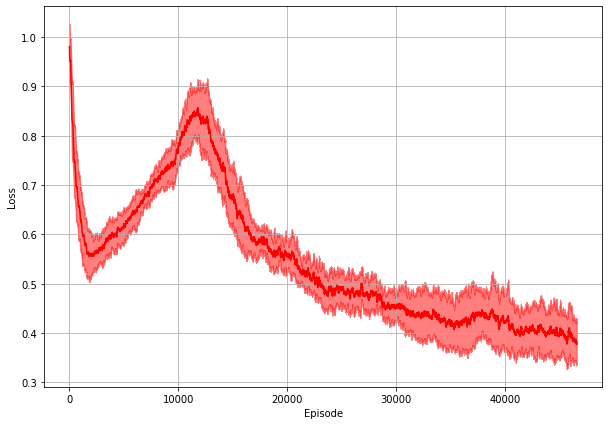

In [40]:
losses = get_episode_data("losses")
make_plot_loss(losses)

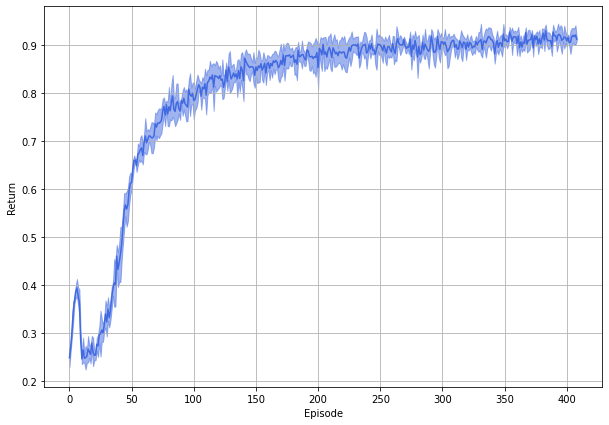

In [174]:
returns = get_episode_data("returns")
make_plot_returns(returns)

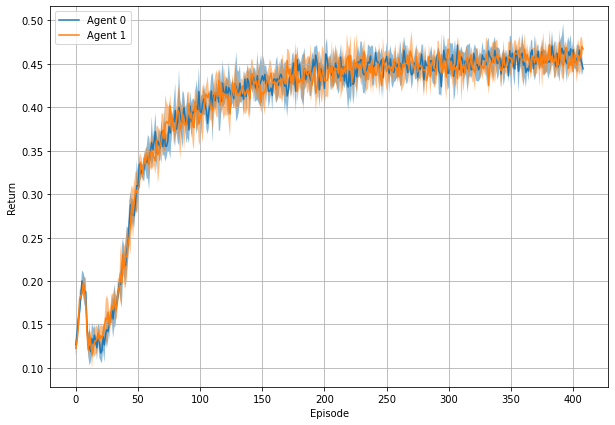

In [175]:
returns = get_episode_data("returns")
make_plot_returns_agent(returns)

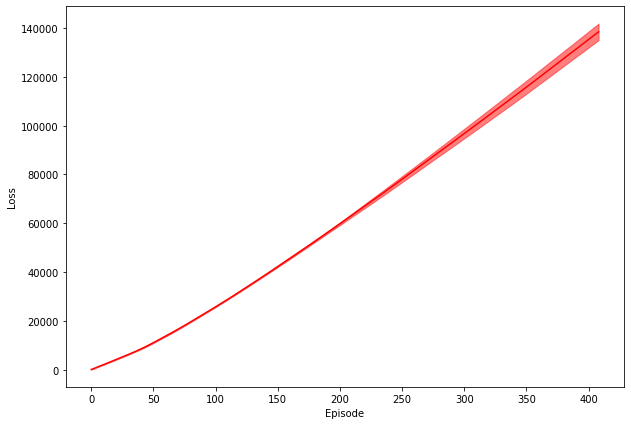

In [178]:
returns_agent = get_episode_data("episodes")
make_plot_loss(returns_agent)

## Data Exploration

In [1]:
import pickle
import seaborn as sns

In [2]:
map = 'lbforaging:Foraging-8x8-2p-3f-v2'

In [3]:
base_path = "/work3/s174437/Blankuca/decision-transformer/gym/data"

with open(f"{base_path}/{map}.pkl", 'rb') as handle:
    dataset = pickle.load(handle)

In [4]:
print("The number of episodes is " + str(len(dataset)))

The number of episodes is 3934


In [21]:
trajectories = defaultdict(list)

trajectories["rewards"] = np.hstack([d["rewards"] for d in dataset])
trajectories["actions"] = np.hstack([d["actions"] for d in dataset])
trajectories["observations"] = np.hstack([d["obs"] for d in dataset])
trajectories["terminals"] = np.hstack([d["terminated"] for d in dataset])
trajectories["states"] = np.vstack([d["state"] for d in dataset])

In [ ]:
sns.displot(trajectories["rewards"], bins=10,label="Episode returns")

In [65]:
episode_returns_agents = np.vstack([d["rewards"].sum(axis=1) for d in dataset])

<Figure size 432x288 with 0 Axes>

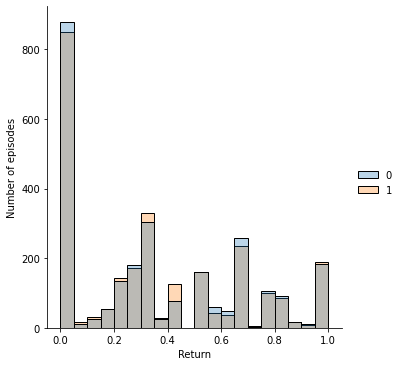

In [89]:
plt.figure()
sns.displot(episode_returns_agents, bins=20,label="Episode lengths", alpha=0.3, color="red")
plt.xlabel("Return")
plt.ylabel("Number of episodes")
plt.show()

<Figure size 432x288 with 0 Axes>

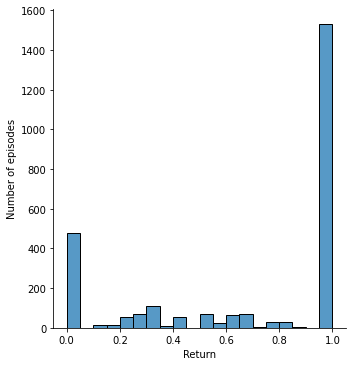

In [88]:
episode_returns = np.hstack([d["rewards"].sum() for d in dataset])

plt.figure()
sns.displot(episode_returns, bins=20,label="Episode lengths")
plt.xlabel("Return")
plt.ylabel("Number of episodes")
plt.show()

<Figure size 432x288 with 0 Axes>

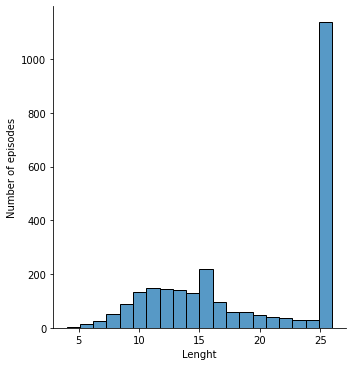

In [41]:
episode_lenghts = np.hstack([len(d["terminated"]) for d in dataset])

plt.figure()
sns.displot(episode_lenghts, bins=20,label="Episode lengths")
plt.xlabel("Lenght")
plt.ylabel("Number of episodes")
plt.show()